In [5]:
import numpy as np
from pylab import *
%matplotlib inline

## Gauss-Seidel method for solving Laplace's equation

Poisson's equation is a generalized partial differential equation of the form:

$$\left( \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2}\right) \rho(x,y,z) = f(x,y,z) = \nabla^2 \rho$$

When we set $f(x,y,z) = 0$, we obtain Laplace's equation.

We can use the Jacobi method, which is related to the one-dimensional relaxation method to solve this problem numerically. However, this is very slow. Computing this to a tolerance even as large as $10^{-2}$ takes about 30+ seconds. The better way to do this is with the [Gauss-Seidel method](https://en.wikipedia.org/wiki/Gauss–Seidel_method)

In [2]:
tol = 10** -2
V=10
a = 1

In [3]:
Phi = np.zeros([100,100], float)

Phip = np.zeros([100,100], float)

In [8]:
def rho(x,y):
    if(x >= 60 and x <= 80 and y>= 20 and y<= 40):
        return -1
    elif (x >= 20 and x <= 40 and y>= 60 and y<= 80):
        return 1
    else:
        return 0
        

In [3]:
## Slow Jacobi Method
err = 100
while err > tol:
    for i in range(100):
        for j in range(100):
            if i == 0 or i == 99:
                Phip[i][j] = Phi[i][j]
            elif j == 0 or j == 99:
                Phip[i][j] = Phi[i][j]
            else:
                Phip[i][j] = 1/4 * (Phi[i-1,j] + Phi[i+1,j] + Phi[i,j-1] + Phi[i,j+1]) + (a**2)/4 * (rho(j, i))
    err = np.max(np.abs(Phi - Phip))
    Phi, Phip = Phip, Phi

NameError: name 'tol' is not defined

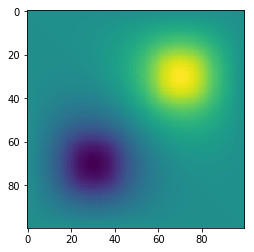

In [10]:
imshow(Phi)

In [9]:
Phi = np.zeros([100,100], float)

Phip = np.zeros([100,100], float)

It took 6.34709358215332 seconds


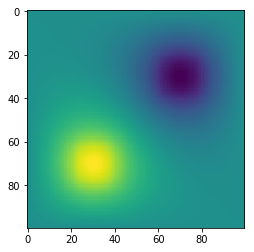

In [13]:
## Fast Gauss-Seidel Method
#Use Gauss-Seidel to do Exercise 9.1


from math import*
from pylab import*
from numpy import*
import numpy as np
import time

Phi = np.zeros([100,100], float)

Phip = np.zeros([100,100], float)

w=0.905
a=1

def rho(x,y):
    if 60<x<80 and 20<y<40:
        return -1
    elif 60<y<80 and 20<x<40:
        return 1
    else:
        return 0

N = 100


phi = zeros([N,N],float)



error = 100
tolerance = 10**-6

timeBefore = time.time()

while error>tolerance:
    biggestDiff = 0
    for i in range(0,N):
        for j in range(0,N):
            if i==0 or i==N-1 or j==0 or j==N-1:
                pass
            else:
                newValue = ((1+w)/4)*(phi[i-1][j]+phi[i+1][j]+phi[i][j-1]+phi[i][j+1])-w*phi[i][j]+a**2/4*rho(j,i)
                diff = abs(phi[i,j]-newValue)
                if diff > biggestDiff:
                    biggestDiff = diff
                phi[i,j] = newValue
    error = biggestDiff
    
timeAfter = time.time()
total=timeAfter - timeBefore
print('It took',total,'seconds')
imshow(phi)
show()

It took 569.0694851875305 seconds


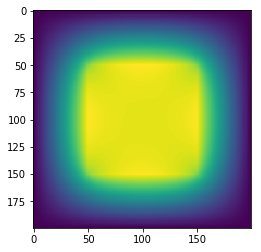

In [40]:
from math import*
from pylab import*
from numpy import*
import numpy as np
import time


w=0.9
a=1

def rho(x,y):
    if x==50 and 50<=y<=150:
        return 1
    elif x==150 and 50<=y<=150:
        return 1
    elif y==50 and 50<=x<=150:
        return 1
    elif y==150 and 50<=x<=150:
        return 1
    else:
        return 0

N = 200


phi = zeros([N,N],float)



error = 100
tolerance = 10**-3

timeBefore = time.time()

while error>tolerance:
    biggestDiff = 0
    for i in range(0,N):
        for j in range(0,N):
            if i==0 or i==N-1 or j==0 or j==N-1:
                pass
            else:
                newValue = ((1+w)/4)*(phi[i-1][j]+phi[i+1][j]+phi[i][j-1]+phi[i][j+1])-w*phi[i][j]+a**2/4*rho(j,i)
                diff = abs(phi[i,j]-newValue)
                if diff > biggestDiff:
                    biggestDiff = diff
                phi[i,j] = newValue
    error = biggestDiff
    
timeAfter = time.time()
total=timeAfter - timeBefore
print('It took',total,'seconds')
imshow(phi)
show()

In [39]:
print("V at (0,0) is {}".format(phi[100][100]))
print("V at (0,.25) is {}".format(phi[125][100]))


def dVdx(x,y):
    h = 1
    return (phi[x+h][y] - phi[x][y])/h

def dVdy(x,y):
    h = 1
    return (phi[x][y+h] - phi[x][y])/h

def E(x,y):
    return (-(dVdx(x,y)), -(dVdy(x,y)))


print("E at (0,0) is {}".format(E(100,100)))
print("E at (0,.25) is {}".format(E(125, 100)))

V at (0,0) is 21.05311291607878
V at (0,.25) is 21.076659736093326
E at (0,0) is (0.0008954631744195751, 0.0008954631744231278)
E at (0,.25) is (-0.0057859309763586, 0.0011755284397949595)
